In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glob

# Data Collecting

In [16]:
def load_and_merge_dataset(file_pattern="*.csv"):
    """
    Loads and merges datasets from CSV files, adding a 'Year' column to each dataset based on the filename,
    and sorts the merged DataFrame by 'Year'."""
    
    # Use glob to find all files matching the pattern
    files = glob.glob(file_pattern)
    
    # list to hold Dataframes
    dataframes = []
    
    for file in files:
        # Extract year from filename (assuming the format 'YYYY.csv')
        year = file.split('.')[0] # Gets the 'YYYY' part from 'YYYY.csv'
         # Read each file into a DataFrame
        df = pd.read_csv(file)
        
        # Add a 'Year' column to the DataFrame
        df['Year'] = int(year)
        # Append to the list
        dataframes.append(df)
        
    
    # Concatenate all datasets in one
    combined_df = pd.concat(dataframes, ignore_index=True)
    # Sort the combined DataFrame by 'Year'
    combined_df.sort_values(by='Year', inplace=True)
    
    # Reset the index after sorting
    combined_df.reset_index(drop=True, inplace=True)
    print("Datasets loaded and merged successfully")
    
    return combined_df

merged_data = load_and_merge_dataset()
display(merged_data)

Datasets loaded and merged successfully


,Google Cloud Region,Location,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh),Year,Grid carbon intensity (gCO2eq / kWh)
0,us-west4,Las Vegas,0.13,491.0,2019,NaN
1,asia-east1,Taiwan,0.19,541.0,2019,NaN
2,asia-east2,Hong Kong,NaN,506.0,2019,NaN
3,asia-northeast1,Tokyo,NaN,569.0,2019,NaN
4,asia-northeast2,Osaka,NaN,414.0,2019,NaN
...,...,...,...,...,...,...
156,europe-west12,Turin,0.52,NaN,2023,249.0
157,europe-west10,Berlin,0.90,NaN,2023,345.0
158,europe-west9,Paris,0.94,NaN,2023,34.0
159,northamerica-northeast2,Toronto,0.87,NaN,2023,47.0


In [17]:
def consolidate_carbon_intensity(dataframe):
    """
    Consolidates the 'Lifecycle grid carbon intensity (gCO2eq / kWh)' and 
    'Grid carbon intensity (gCO2eq / kWh)' columns into a single column in the provided DataFrame."""
    
    # Consolidate the two columns into a new column
    dataframe['Consolidated Grid Carbon Intensity (gCO2eq / kWh)'] = dataframe['Lifecycle grid carbon intensity (gCO2eq / kWh)'].combine_first(dataframe['Grid carbon intensity (gCO2eq / kWh)'])
    
    # Drop the original two columns
    dataframe.drop(['Lifecycle grid carbon intensity (gCO2eq / kWh)', 'Grid carbon intensity (gCO2eq / kWh)'], axis=1, inplace=True)
    
    # Rename the Dataframe
    df = dataframe
    
    print("Carbon intensity columns consolidated successfully.")
    
    return df

df = consolidate_carbon_intensity(merged_data)
display(df)

Carbon intensity columns consolidated successfully.


,Google Cloud Region,Location,Google CFE,Year,Consolidated Grid Carbon Intensity (gCO2eq / kWh)
0,us-west4,Las Vegas,0.13,2019,491.0
1,asia-east1,Taiwan,0.19,2019,541.0
2,asia-east2,Hong Kong,NaN,2019,506.0
3,asia-northeast1,Tokyo,NaN,2019,569.0
4,asia-northeast2,Osaka,NaN,2019,414.0
...,...,...,...,...,...
156,europe-west12,Turin,0.52,2023,249.0
157,europe-west10,Berlin,0.90,2023,345.0
158,europe-west9,Paris,0.94,2023,34.0
159,northamerica-northeast2,Toronto,0.87,2023,47.0


# Data Exploration

In [18]:
def print_summarize_dataset(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0].sort_values(ascending=False))
    print()
    print("Data Types:")
    print(df.dtypes)
    print("Statistical summary:")
    display(df.describe())
    
print_summarize_dataset(df)

Google CFE    19
dtype: int64

Data Types:
Google Cloud Region                                   object
Location                                              object
Google CFE                                           float64
Year                                                   int64
Consolidated Grid Carbon Intensity (gCO2eq / kWh)    float64
dtype: object
Statistical summary:


,Google CFE,Year,Consolidated Grid Carbon Intensity (gCO2eq / kWh)
count,142.000000,161.000000,161.000000
mean,0.498944,2021.254658,354.565217
std,0.310666,1.388702,199.431968
min,0.000000,2019.000000,0.000000
25%,0.240000,2020.000000,172.000000
50%,0.520000,2021.000000,372.000000
75%,0.820000,2022.000000,493.000000
max,1.000000,2023.000000,752.000000


In [19]:
def missing_values(df):
    # Fill missing values in 'Google CFE' with the median
    df['Google CFE'].fillna(df['Google CFE'].median(), inplace=True)
    
    return df

cleaned_df = missing_values(merged_data)
print_summarize_dataset(cleaned_df)
# Save the dataset after cleaning
cleaned_df.to_csv("merged_data_clean.csv", index=False)

Series([], dtype: int64)

Data Types:
Google Cloud Region                                   object
Location                                              object
Google CFE                                           float64
Year                                                   int64
Consolidated Grid Carbon Intensity (gCO2eq / kWh)    float64
dtype: object
Statistical summary:


,Google CFE,Year,Consolidated Grid Carbon Intensity (gCO2eq / kWh)
count,161.000000,161.000000,161.000000
mean,0.501429,2021.254658,354.565217
std,0.291717,1.388702,199.431968
min,0.000000,2019.000000,0.000000
25%,0.260000,2020.000000,172.000000
50%,0.520000,2021.000000,372.000000
75%,0.790000,2022.000000,493.000000
max,1.000000,2023.000000,752.000000


# Data Visualization

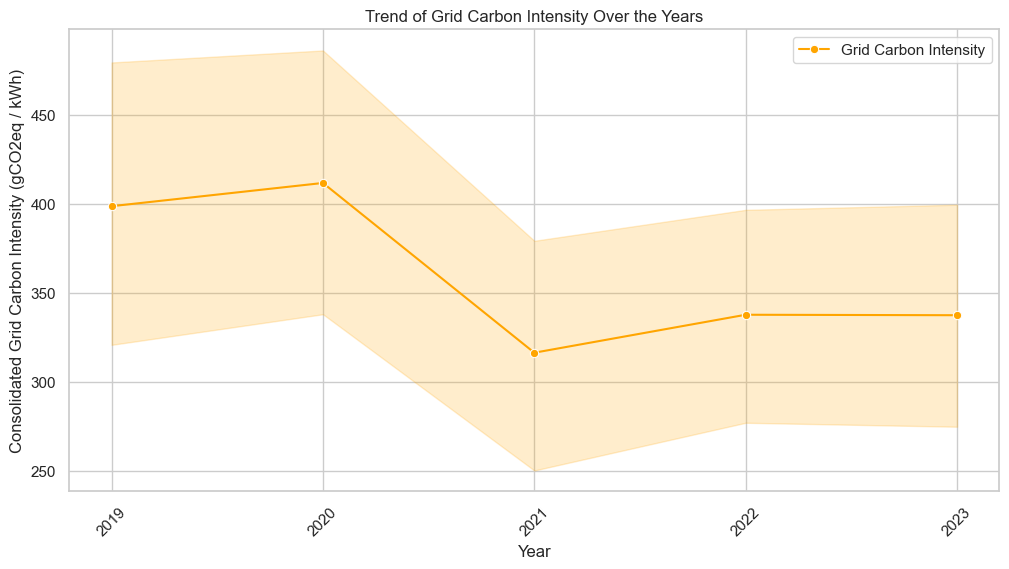

In [20]:
def plot_comparative_analysis(df):
    sns.set(style="whitegrid", palette="pastel")
    # Convert Year to string to treat it as a categorical variable
    df['Year'] = df['Year'].astype(str)
    
    # Plot 'Consolidated Grid Carbon Intensity' trend over the years
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Consolidated Grid Carbon Intensity (gCO2eq / kWh)', marker='o', label='Grid Carbon Intensity', color='orange')
    
    # Customize the plot
    plt.title('Trend of Grid Carbon Intensity Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Consolidated Grid Carbon Intensity (gCO2eq / kWh)')
    plt.xticks(rotation=45)
    plt.show()

    
plot_comparative_analysis(df)


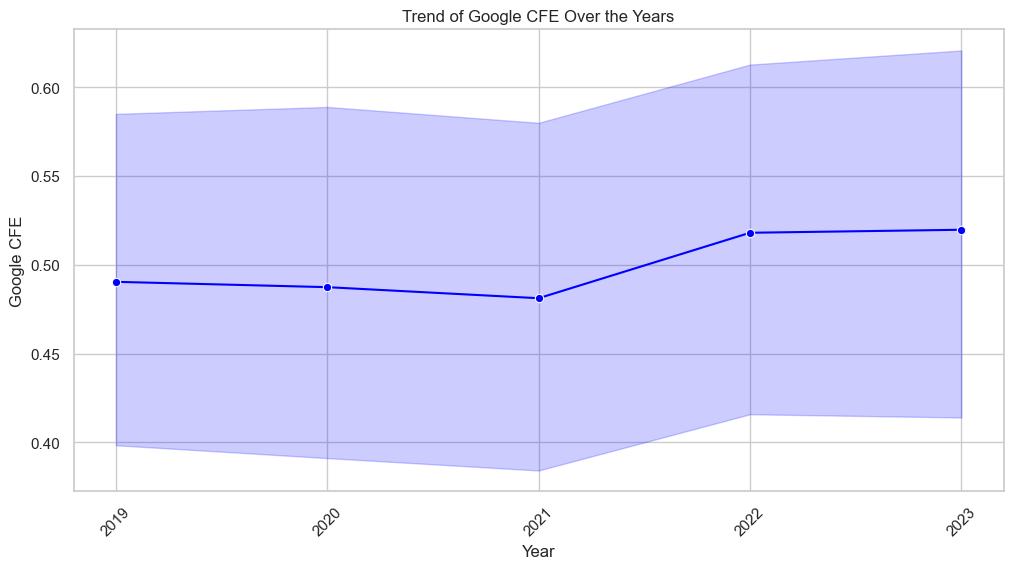

In [7]:
def plot_google_cfe_analysis(df):
    sns.set(style="whitegrid", palette="muted")
    
    # Convert Year to string to treat it as a categorical variable
    df['Year'] = df['Year'].astype(str)
    
    # Plot 'Google CFE' trend over the years
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Google CFE', marker='o', color='blue')
    
    # Customize the plot
    plt.title('Trend of Google CFE Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Google CFE')
    plt.xticks(rotation=45)
    plt.show()

# Usage Example
plot_google_cfe_analysis(merged_data)

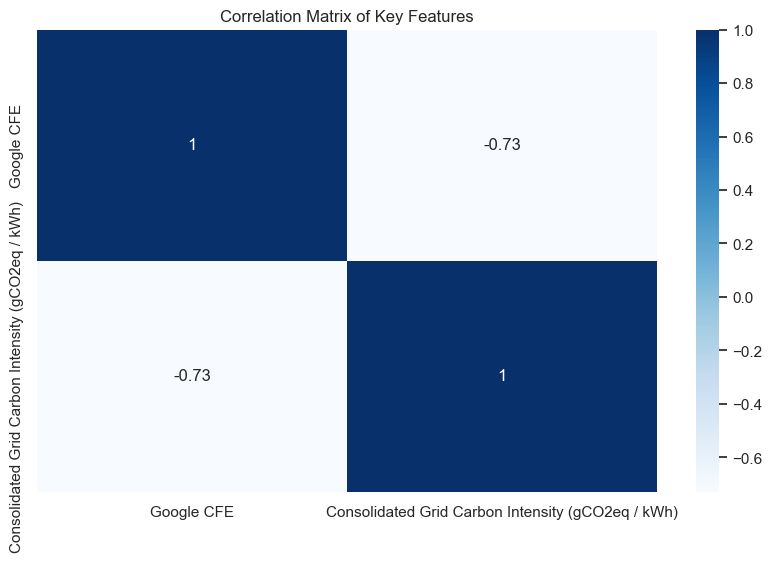

In [8]:
def plot_correlation_matrix(df):
    columns = ['Google CFE', 'Consolidated Grid Carbon Intensity (gCO2eq / kWh)']
    # Compute the correlation matrix
    corr_matrix = df[columns].corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0)
    plt.title('Correlation Matrix of Key Features')
    plt.show()
    
plot_correlation_matrix(df)

#### The correlation matrix shows a strong negative correlation (-0.73) between Google CFE and Consolidated Grid Carbon Intensity (gCO2eq / kWh).

#### This negative correlation implies that as Google CFE (Carbon-Free Energy) increases, the Consolidated Grid Carbon Intensity tends to decrease. This makes sense as higher usage of carbon-free energy should reduce the carbon intensity of the grid.

#### The strong negative correlation is a promising indicator for predictive modeling; these features could be useful for models where the goal is to predict grid carbon intensity or classify regions based on Google CFE.

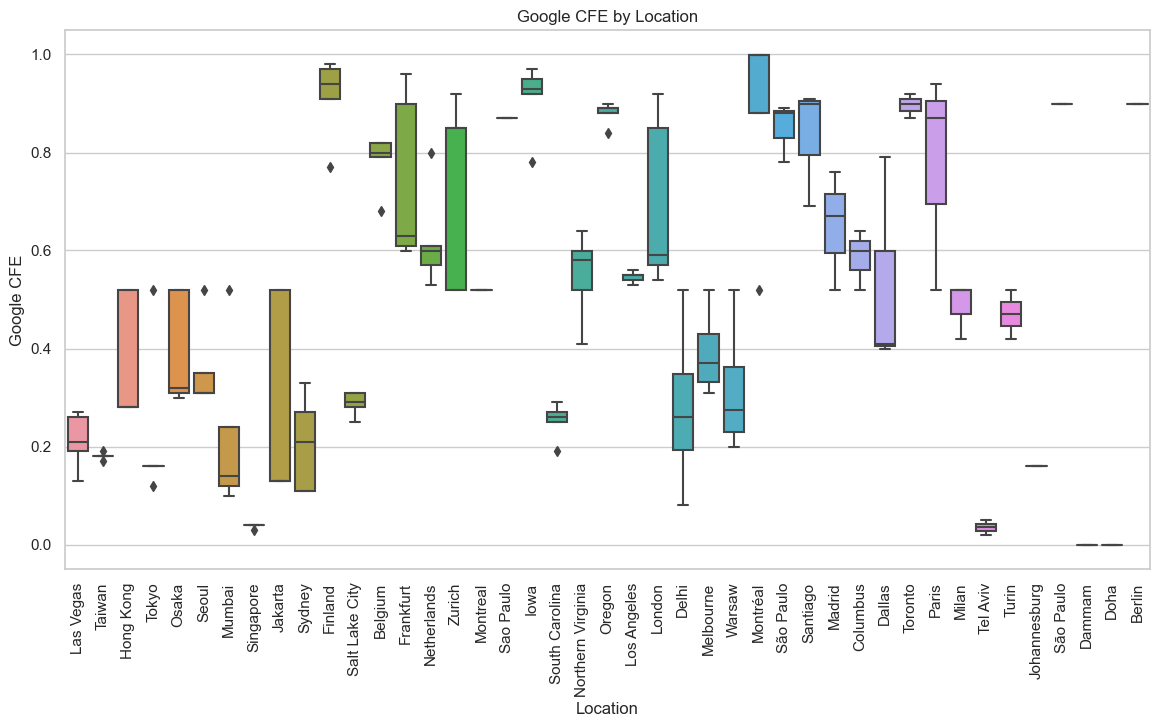

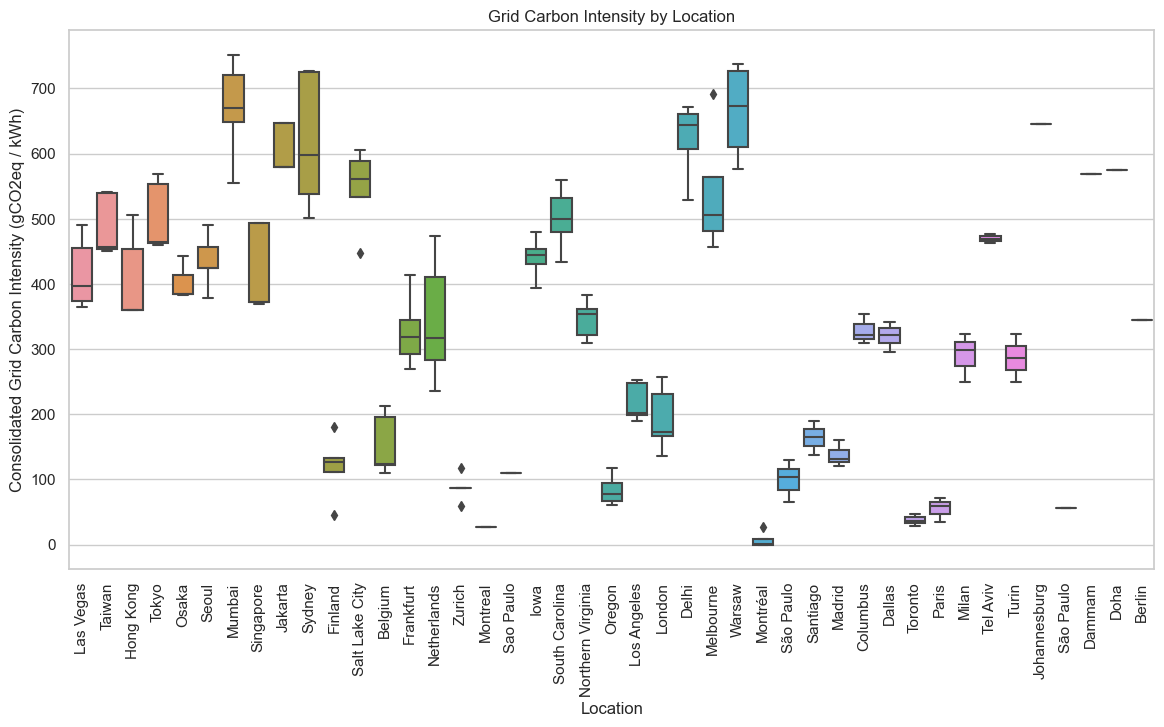

In [9]:
def plot_location_based_analysis(df):
    # Plot Boxplot
    plt.figure(figsize=(14,7))
    sns.boxplot(x='Location', y='Google CFE', data=df)
    plt.xticks(rotation=90)
    plt.title('Google CFE by Location')
    plt.show()
    
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Location', y='Consolidated Grid Carbon Intensity (gCO2eq / kWh)', data=df)
    plt.xticks(rotation=90)
    plt.title('Grid Carbon Intensity by Location')
    plt.show()
    
plot_location_based_analysis(df)
    
    

#### Google CFE by Location (Box Plot) : Locations such as Singapore, Sydney, and Frankfurt have relatively high median values and larger spread, indicating variability in CFE.
#### Locations like Berlin, Doha, and Johannesburg show consistently low Google CFE, with little to no variation, indicating minimal reliance on carbon-free energy.

#### This plot is useful for identifying regions with higher carbon-free energy utilization. It can be used for categorization or clustering tasks in machine learning where you may want to classify or group locations based on their energy usage profiles.

#### Grid Carbon Intensity by Location (Box Plot) : Hong Kong, Taiwan, and Singapore exhibit high carbon intensity with large interquartile ranges, indicating high variability and potential inefficiencies.
#### Locations like Zurich, Milan, and Berlin show low carbon intensity and minimal variability, suggesting efficient energy grids or significant use of renewable energy sources.

#### This visualization helps to identify outliers and variability in grid carbon intensity, which could be key for regression models aiming to predict grid intensity or classification models that categorize locations by high or low carbon intensity.


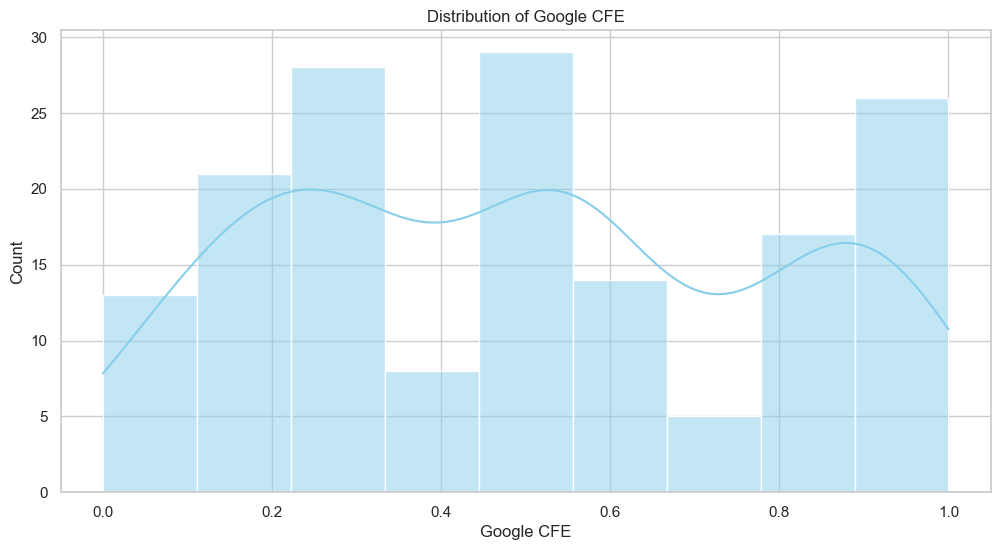

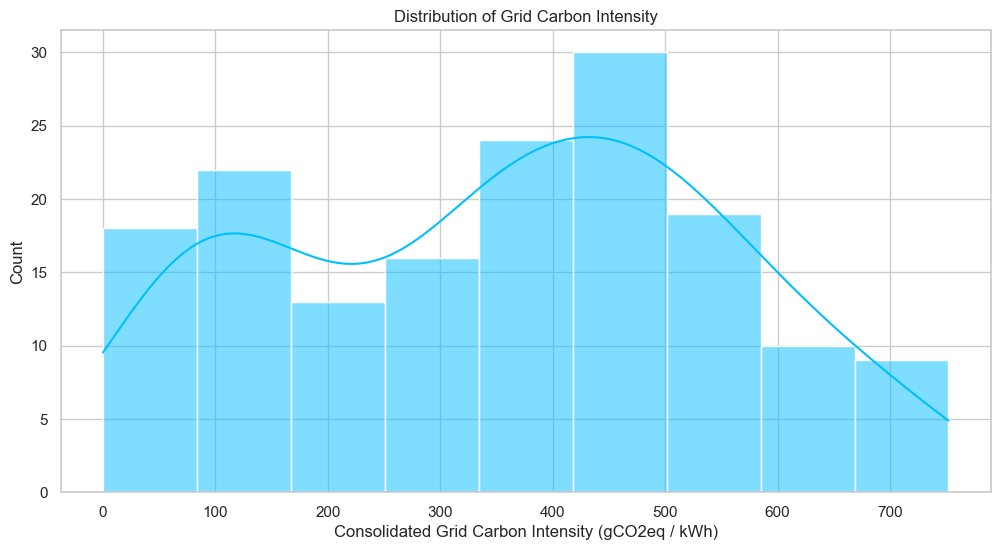

In [10]:
def plot_distribution_analysis(df):
    sns.set(style="whitegrid", palette="pastel")
    
    # Plots histograms and KDE plots to analyze the distribution of key metrics
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Google CFE'], kde=True, color='skyblue')
    plt.title('Distribution of Google CFE')
    plt.xlabel('Google CFE')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df['Consolidated Grid Carbon Intensity (gCO2eq / kWh)'], kde=True, color='deepskyblue')
    plt.title('Distribution of Grid Carbon Intensity')
    plt.xlabel('Consolidated Grid Carbon Intensity (gCO2eq / kWh)')
    plt.show()

# Usage Example
plot_distribution_analysis(df)

#### These distributions indicate that normalization or scaling might be required when preparing the data for machine learning models. The spread in values suggests that different regions behave differently, which could be leveraged when creating features like location-based categories.


# Machine Learning

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [12]:
def model_exploration(df):
    """
    Explores regression and classification models to predict 'Consolidated Grid Carbon Intensity (gCO2eq / kWh)'
    and categorize locations based on 'Google CFE'"""
    
    # Prepare data for regression
    X_reg = df[['Google CFE']] # Using Google CFE as a feature for regression
    y_reg = df['Consolidated Grid Carbon Intensity (gCO2eq / kWh)']
    
    # Train-test split for regression
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
    
    #Linear Regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = lin_reg.predict(X_test_reg)
    print("Linear Regression Results:")
    print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}\n")
    
    # Random Forest Regressor
    rf_reg = RandomForestRegressor(random_state=42)
    rf_reg.fit(X_train_reg, y_train_reg)
    y_pred_rf_reg = rf_reg.predict(X_test_reg)
    print("Random Forest Regressor Results:")
    print(f"R^2 Score: {r2_score(y_test_reg, y_pred_rf_reg):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_rf_reg):.2f}\n")
    
    # Prepare data for classification
    df['Google CFE High/Low'] = np.where(df['Google CFE'] > 0.5, 1, 0)  # Categorize based on median value
    X_clf = df[['Consolidated Grid Carbon Intensity (gCO2eq / kWh)']] # Using grid carbon intensity as a feature
    y_clf = df['Google CFE High/Low']
    
    # Train-test split for classification
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
    
    # Logistic Regression
    log_reg = LogisticRegression()
    log_reg.fit(X_train_clf, y_train_clf)
    y_pred_clf = log_reg.predict(X_test_clf)
    print("Logistic Regression Results:")
    print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.2f}")
    print(f"Classidication Report:\n{classification_report(y_test_clf, y_pred_clf)}\n")
    
    # Random Forest Classifier
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train_clf, y_train_clf)
    y_pred_rf_clf = rf_clf.predict(X_test_clf)
    print("Random Forest Classifier Results:")
    print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_rf_clf):.2f}")
    print(f"Classification Report:\n{classification_report(y_test_clf, y_pred_rf_clf)}\n")
    
model_exploration(df)
    
    

Linear Regression Results:
R^2 Score: 0.51
Mean Squared Error: 22057.04

Random Forest Regressor Results:
R^2 Score: 0.55
Mean Squared Error: 20164.13

Logistic Regression Results:
Accuracy: 0.82
Classidication Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.81      0.81      0.81        16

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33


Random Forest Classifier Results:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.67      0.88      0.76        16

    accuracy                           0.73        33
   macro avg       0.75      0.73      0.72        33
weighted avg       0.75      0.73      0.72        33




### Key Takeaways

#### Regression Models:
##### Random Forest Regressor slightly outperforms Linear Regression in both variance explanation (R²) and error reduction (MSE).
##### Both models need additional features or tuning to improve performance.
#### Classification Models:
##### Logistic Regression performs better than the Random Forest Classifier with an accuracy of 82%.
##### The precision, recall, and F1-scores indicate balanced performance across both classes.

#### Next Steps:
##### For regression, explore additional features, hyperparameter tuning, or more complex models like Gradient Boosting or Neural Networks.
##### For classification, consider rebalancing the dataset or experimenting with hyperparameters in Random Forest.

In [14]:
def prepare_data_for_ml(df):
    # Step 1 Feature Engineering
    
    # Categorical Features for Locations
    df['Location High CFE'] = np.where(df['Google CFE'] > 0.5, 1, 0) # High CFE if above 0.5, else Low CFE
    df['Location High Carbon Intensity'] = np.where(df['Consolidated Grid Carbon Intensity (gCO2eq / kWh)'] > 400, 1, 0) # High intensity if above 400

    # Year-Over-Year % change for Grid Carbon Intensity and Google CFE
    df = df.sort_values(by=['Location', 'Year']) 
    
    if df.groupby('Location')['Year'].nunique().min() > 1:
        df['Grid Carbon Intensity YoY Change (%)'] = df.groupby('Location')['Consolidated Grid Carbon Intensity (gCO2eq / kWh)'].pct_change() * 100
        df['Google CFE YoY Change (%)'] = df.groupby('Location')['Google CFE'].pct_change() * 100
    else:
        df['Grid Carbon Intensity YoY Change (%)'] = 0
        df['Google CFE YoY Change (%)'] = 0
    
    # Handling NaN values from % change 
    df.fillna(0, inplace=True) # Replace NaN values resulting from pct_change with 0
    
    # Standard Deviation of Grid Carbon Intensity and Google CFE by Location
    variability_df = df.groupby('Location')[['Consolidated Grid Carbon Intensity (gCO2eq / kWh)', 'Google CFE']].std().reset_index()
    variability_df.columns = ['Location', 'Grid Carbon Intensity StdDev', 'Google CFE StdDev']
    df = pd.merge(df, variability_df, on='Location', how='left')
    
    # Step 2 Data Normalization and Scaling
    scale_columns = [
        'Google CFE', 
        'Consolidated Grid Carbon Intensity (gCO2eq / kWh)', 
        'Grid Carbon Intensity YoY Change (%)', 
        'Google CFE YoY Change (%)',
        'Grid Carbon Intensity StdDev', 
        'Google CFE StdDev'
    ]
    
    # Min-Max scaling
    scaler = MinMaxScaler()
    df[scale_columns] = scaler.fit_transform(df[scale_columns])
    
    print("Feature engineering and data preparation completed. Data is ready for ML modeling.")
    return df

prepared_data = prepare_data_for_ml(merged_data)
print(prepared_data.head())

Feature engineering and data preparation completed. Data is ready for ML modeling.
  Google Cloud Region Location  Google CFE  Year   
0        europe-west1  Belgium        0.68  2019  \
1        europe-west1  Belgium        0.79  2020   
2        europe-west1  Belgium        0.82  2021   
3        europe-west1  Belgium        0.80  2022   
4        europe-west1  Belgium        0.82  2023   

   Consolidated Grid Carbon Intensity (gCO2eq / kWh)  Google CFE High/Low   
0                                           0.260638                    1  \
1                                           0.281915                    1   
2                                           0.146277                    1   
3                                           0.163564                    1   
4                                           0.162234                    1   

   Location High CFE  Location High Carbon Intensity   
0                  1                               0  \
1                  1         

#### Feature Engineering Success:
##### Binary features and YoY changes were added for advanced analysis.
##### Variability across years (standard deviation) highlights trends or consistency for each location.

#### Normalized Data:
##### All numerical features are scaled to improve model compatibility and performance.

#### Data Ready for Machine Learning:
##### The dataset now includes engineered features (High CFE, High Carbon Intensity) and scaled metrics, making it suitable for both regression and classification tasks.

In [15]:
model_exploration(prepared_data)

Linear Regression Results:
R^2 Score: 0.66
Mean Squared Error: 0.02

Random Forest Regressor Results:
R^2 Score: 0.49
Mean Squared Error: 0.03

Logistic Regression Results:
Accuracy: 0.73
Classidication Report:
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.70      0.82      0.76        17

    accuracy                           0.73        33
   macro avg       0.73      0.72      0.72        33
weighted avg       0.73      0.73      0.72        33


Random Forest Classifier Results:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.82      0.82      0.82        17

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33




#### Key Insights from the Results
##### Regression:
##### Linear Regression performs better than Random Forest Regressor, likely due to the simplicity of the dataset and the linear relationship between Google CFE and Grid Carbon Intensity.
##### Further improvements could involve adding more features or exploring advanced models like Gradient Boosting.

##### Classification:
##### Random Forest Classifier outperforms Logistic Regression in accuracy and F1-Score, making it the best choice for categorizing locations.
##### The engineered features and scaling contribute to the model's success.